# 数据清洗流程

## 1. 缺失值处理
- 识别并填补缺失值
- 删除含缺失值的行/列

## 2. 重复数据处理
- 检查并删除重复数据
- 确保每条数据唯一性

## 3. 异常值处理
- 识别极端值、错误值
- 采用适当方法处理（如截断、替换）

## 4. 数据格式转换
- 转换数据类型（如字符串转数值）
- 单位转换（如货币、计量单位）
- 日期格式标准化

## 5. 标准化与归一化
- **标准化**：Z-score方法
- **归一化**：Min-Max缩放
- 其他缩放方法：Robust Scaling

## 6. 类别数据编码
- One-Hot编码（哑变量）
- 标签编码（Label Encoding）
- 其他编码方法：频率编码、目标编码

## 7. 文本处理
- 基础清洗：去除停用词、特殊字符
- 高级处理：
  - 词干化（Stemming）
  - 词形还原（Lemmatization）
  - 分词（Tokenization）

## 8. 数据抽样
- 随机抽样
- 分层抽样
- 处理类别不平衡：
  - 过采样（如SMOTE）
  - 欠采样

## 9. 特征工程
- 特征创建（特征组合、分解）
- 特征选择：
  - 删除低方差特征
  - 基于重要性的特征筛选
- 维度约减（PCA等）

In [10]:
import pandas as pd
import os

os.getcwd()
# 数据读取
# 读取csv时常用header设置标题行(默认为0，有时设置为None);names设置列名;skiprows通过指定行数;nrows读取前几行;na_values将哪些数据视为空值
data = pd.read_csv("train.csv", sep=",", encoding='utf-8', na_values=['n/a', 'NA', '--', 'na']) # 默认空值为n/a和NA
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# `dropna()` 方法 - 删除空值数据

用于删除 DataFrame 中包含空值的行或列。

## 方法语法
```python
DataFrame.dropna(
    axis=0, 
    how='any', 
    thresh=None, 
    subset=None, 
    inplace=False
)
```
## 参数详解

### `axis` 
- **类型**：`int` 或 `str`  
- **可选值**：`0`/`'index'` 或 `1`/`'columns'`  
- **默认**：`0`  
- **作用**：  
  ▸ `0` 或 `'index'`：删除包含空值的整行  
  ▸ `1` 或 `'columns'`：删除包含空值的整列  

### `how` 
- **类型**：`str`  
- **可选值**：`'any'` 或 `'all'`  
- **默认**：`'any'`  
- **作用**：  
  ▸ `'any'`（默认）：行/列中任意一个空值即删除  
  ▸ `'all'`：仅当行/列全部为空值时才删除  

### `thresh` 
- **类型**：`int`  
- **默认**：`None`  
- **作用**：  
  设置保留行/列所需的最小非空值数量  
  **示例**：  
  `thresh=5` 表示保留至少有 5 个非空值的行/列  

### `subset` 
- **类型**：`list` 或 `array-like`  
- **默认**：`None`  
- **作用**：  
  指定要检查空值的列（仅在 `axis=0` 时有效）  
  **示例**：  
  `subset=['name', 'age']` 只检查这两列的空值情况  

### `inplace` 
- **类型**：`bool`  
- **默认**：`False`  
- **作用**：  
  ▸ `False`（默认）：返回处理后的新对象，原数据不变  
  ▸ `True`：直接修改原数据，不返回新对象  
  ⚠️ **注意**：此操作不可逆，建议提前备份数据  

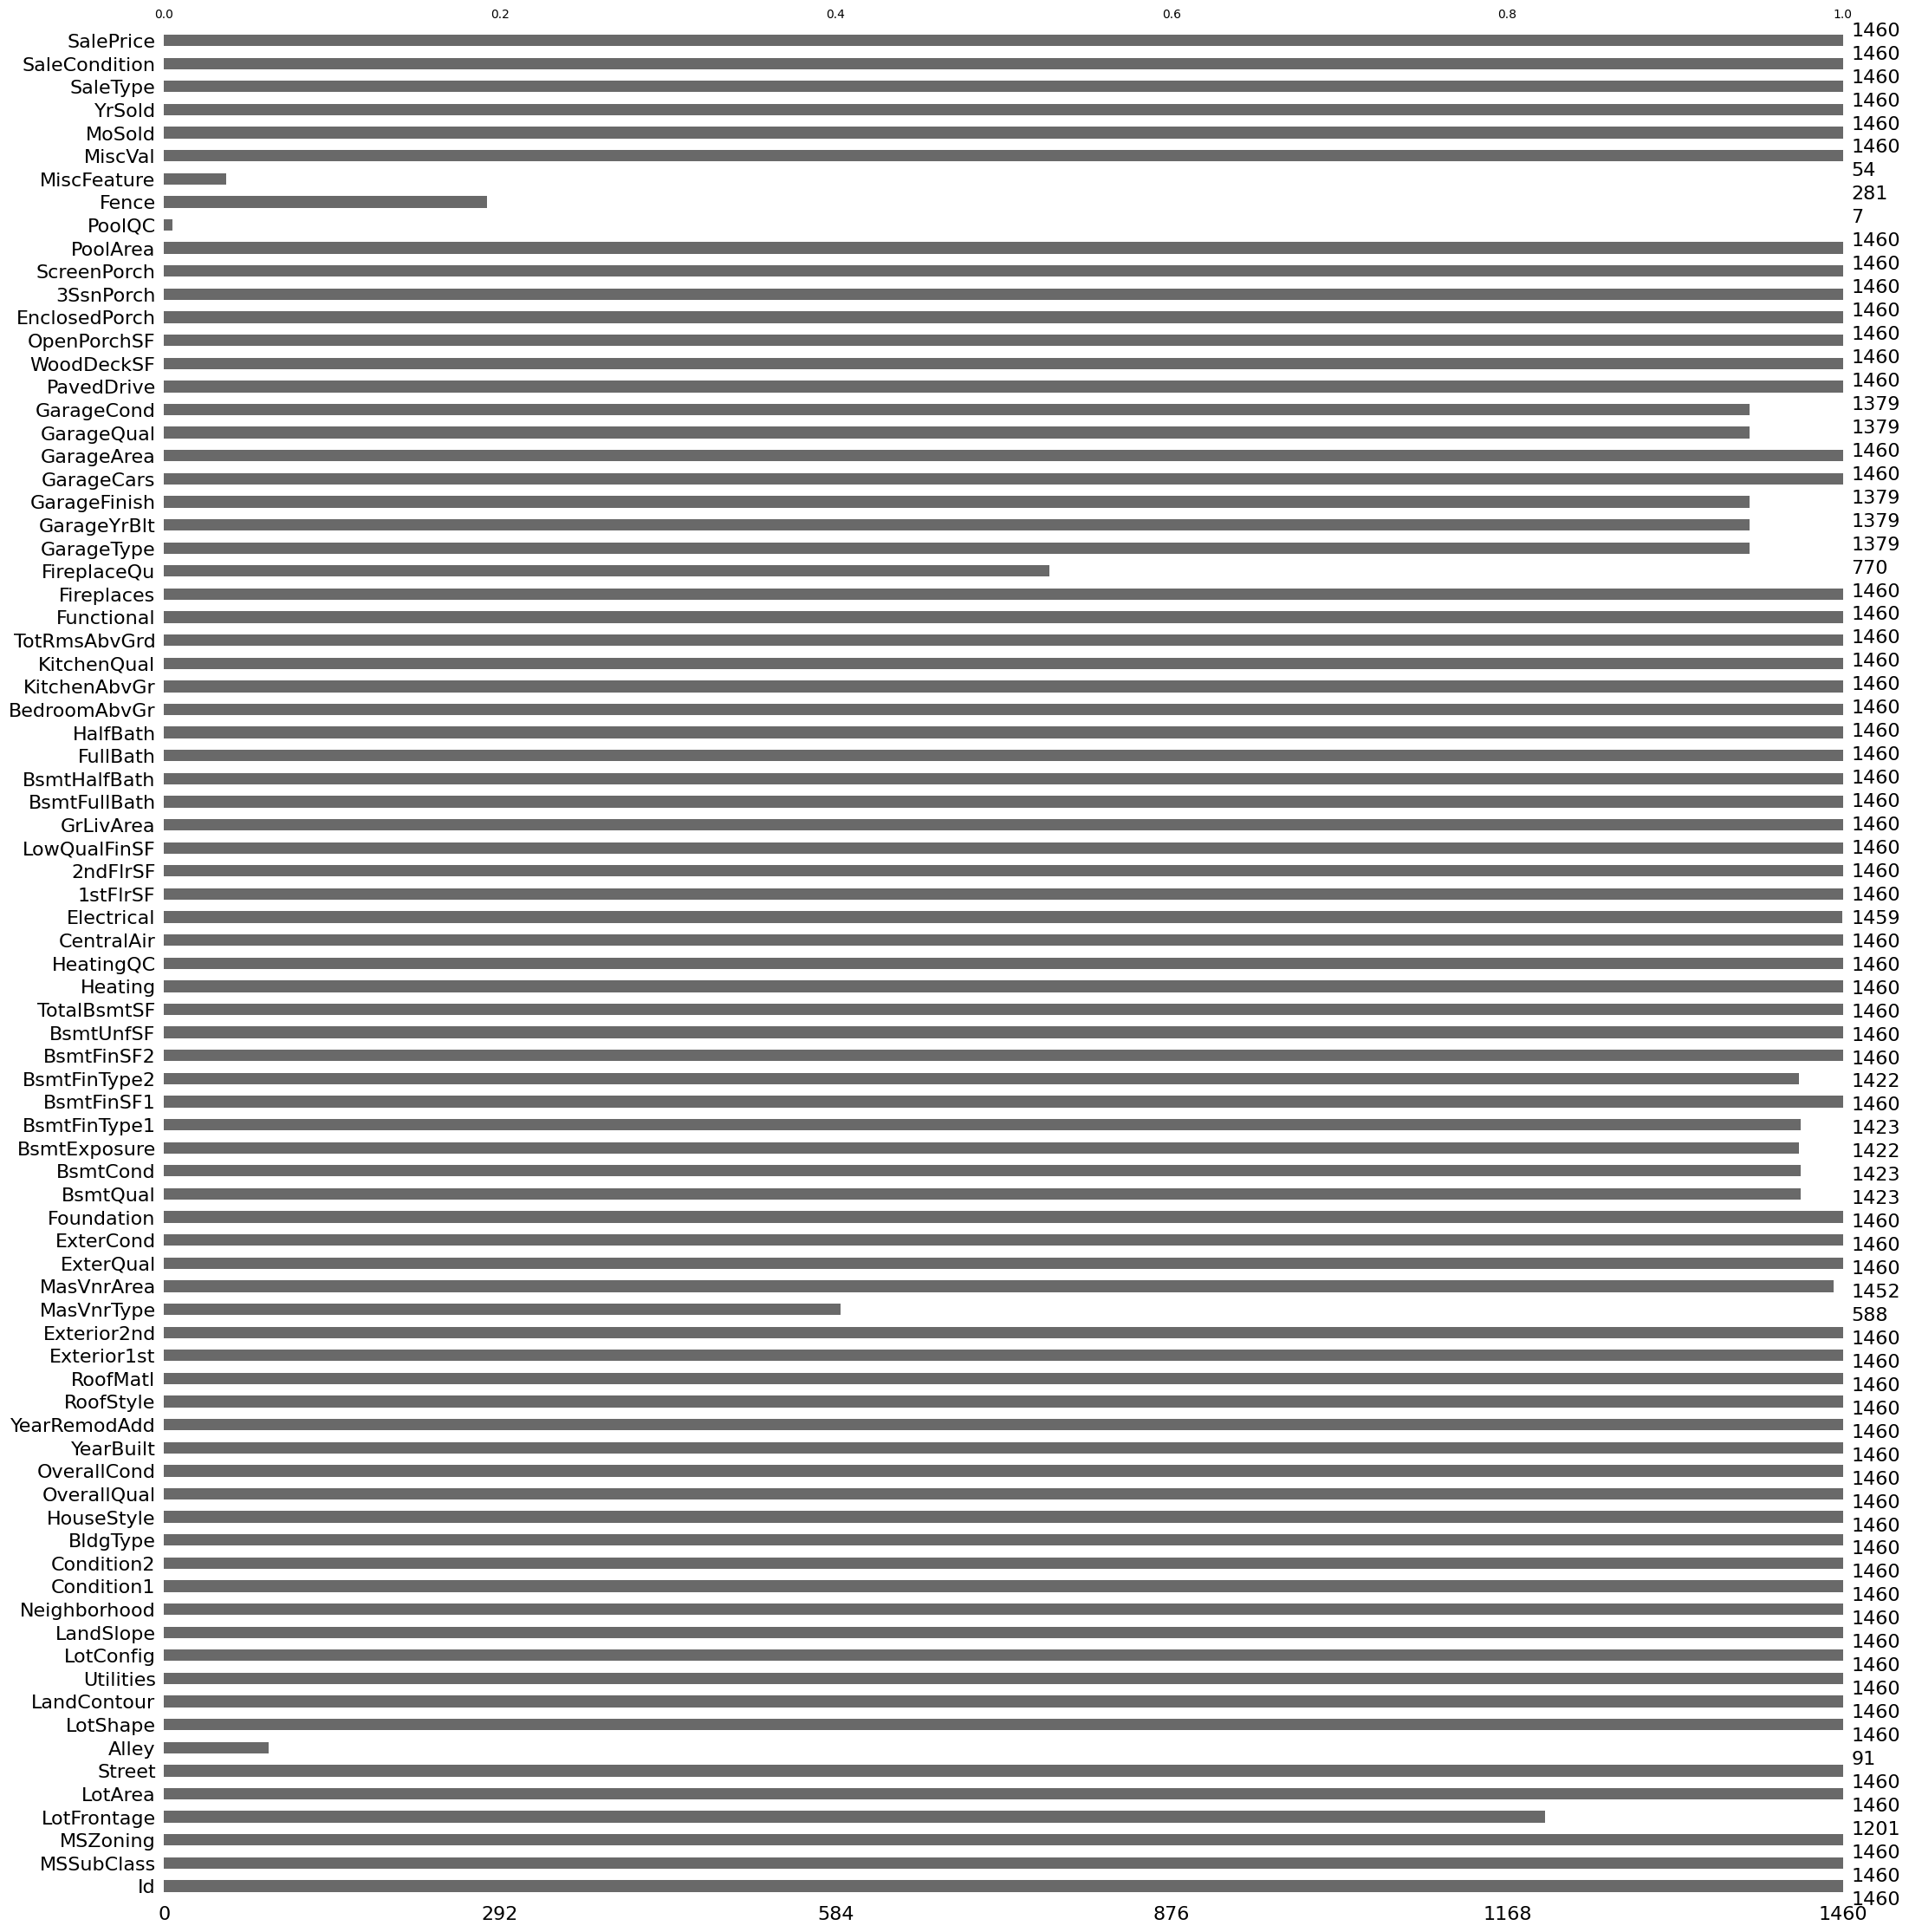

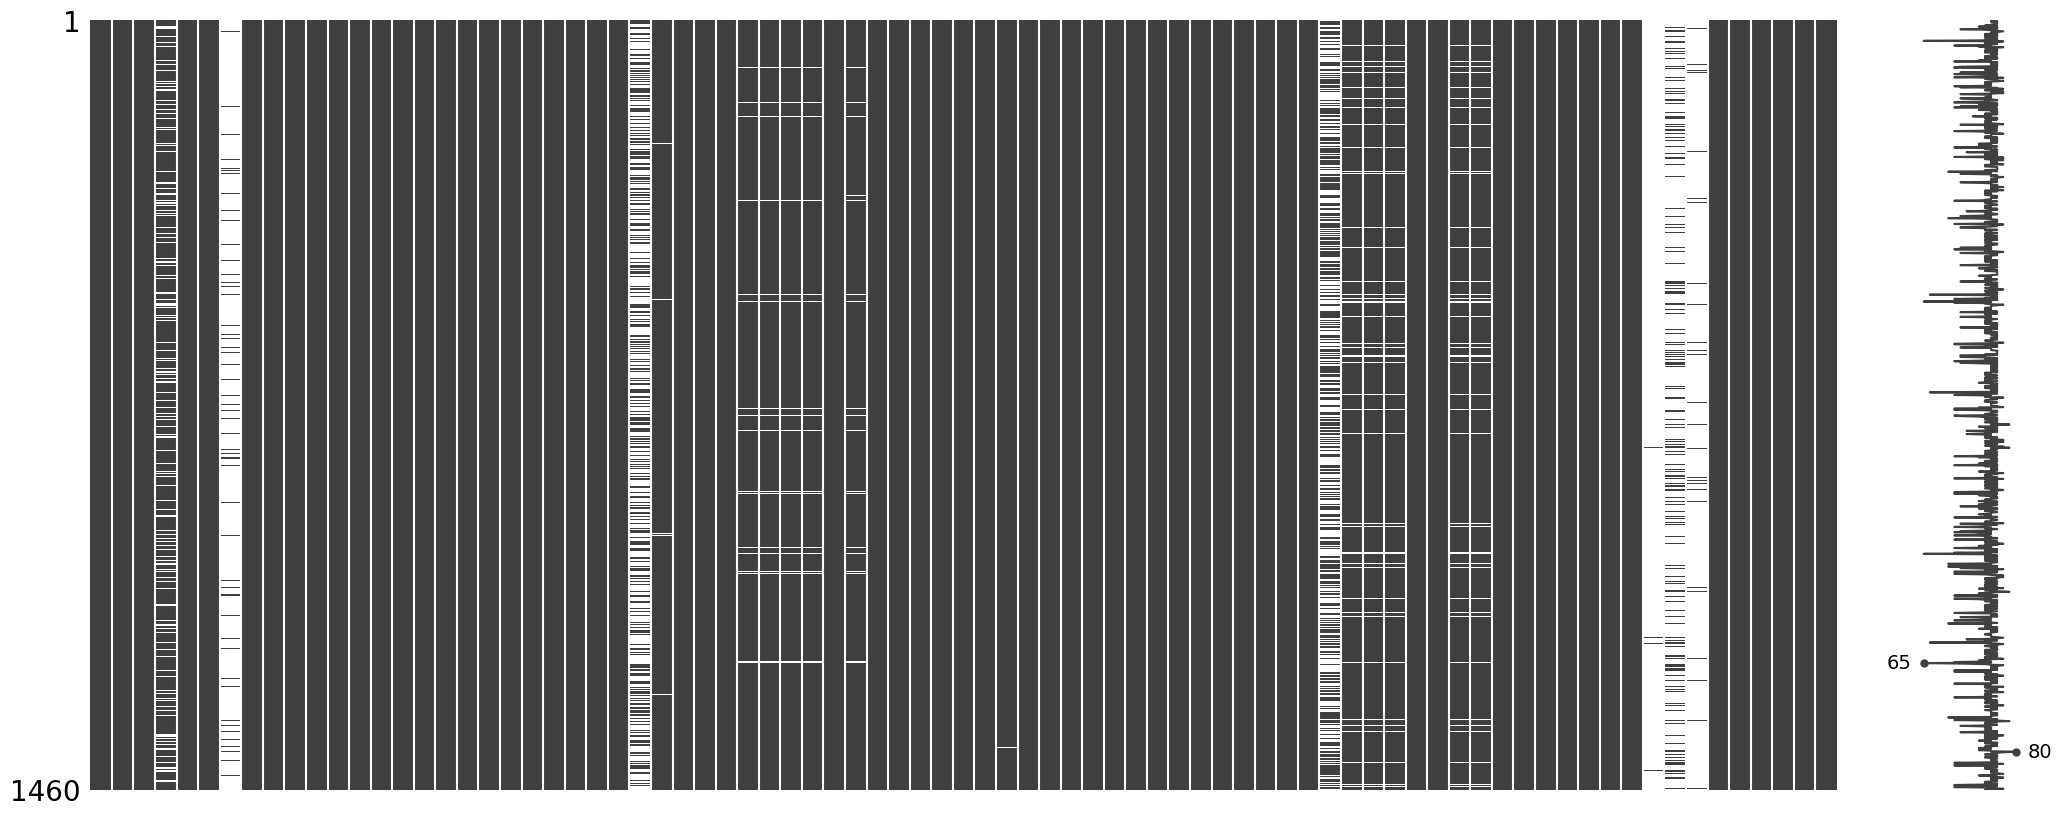

In [11]:
# 空值处理

# 空值可视化
# 使用missingno包可以对空值的数量与分布进行可视化
import missingno as msn
msn.bar(data)
msn.matrix(data, labels = False, label_rotation = 90)

# 删除所有特征均为空的记录
data.dropna(how='all', inplace=True)

# 删除Id为空的记录
data.dropna(subset='Id', inplace=True)

# 删除空值过多的列
data = data.drop(['MiscFeature', 'PoolQC', 'Alley'], axis= 1)


In [12]:
# 重复值处理
data = data.drop_duplicates(subset='Id', keep='first')